In [20]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as mlp
import seaborn as sns

In [21]:
dataset=pd.read_csv(r"C:\Users\yuvar\Downloads\archive (10)\clinvar_conflicting.csv")

C:\Users\yuvar\AppData\Local\Temp\ipykernel_21624\995486465.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(r"C:\Users\yuvar\Downloads\archive (10)\clinvar_conflicting.csv")


In [22]:
dataset.shape

(65188, 46)

In [23]:
dataset.head(5)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [24]:
dataset.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [ ]:
Here we have more than 50% of the total data is null , its not possible to fill the null values by using any type of methods.so we have to drop the columns in the dataset

In [25]:
dataset.drop("CLNDISDBINCL",axis=1,inplace=True)
dataset.drop("CLNDNINCL",axis=1,inplace=True)
dataset.drop("CLNSIGINCL",axis=1,inplace=True)
dataset.drop("SSR",axis=1,inplace=True)
dataset.drop("MOTIF_NAME",axis=1,inplace=True)
dataset.drop("MOTIF_POS",axis=1,inplace=True)
dataset.drop("HIGH_INF_POS",axis=1,inplace=True)
dataset.drop("MOTIF_SCORE_CHANGE",axis=1,inplace=True)
dataset.drop("INTRON",axis=1,inplace=True)
dataset.drop("DISTANCE",axis=1,inplace=True)
dataset.drop("BAM_EDIT",axis=1,inplace=True)
dataset.drop("CLNVI",axis=1,inplace=True)
dataset.drop("BLOSUM62",axis=1,inplace=True)
dataset.drop("SIFT",axis=1,inplace=True)
dataset.drop("PolyPhen",axis=1,inplace=True)
dataset.drop("CHROM",axis=1,inplace=True)

In [26]:
dataset.head(5)

,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,...,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,single_nucleotide_variant,...,1/1,552,522,174,E/D,gaG/gaC,1.0,NaN,1.053,-0.208682
1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,single_nucleotide_variant,...,4/4,523,509,170,P/L,cCg/cTg,-1.0,NaN,31.000,6.517838
2,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,single_nucleotide_variant,...,6/12,632,239,80,I/T,aTc/aCc,-1.0,NaN,28.100,6.061752
3,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,single_nucleotide_variant,...,1/7,132,100,34,G/S,Ggc/Agc,1.0,NaN,22.500,3.114491
4,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,single_nucleotide_variant,...,1/7,132,100,34,G/C,Ggc/Tgc,1.0,NaN,24.700,4.766224


In [27]:
dataset.isnull().sum()

POS                     0
REF                     0
ALT                     0
AF_ESP                  0
AF_EXAC                 0
AF_TGP                  0
CLNDISDB                0
CLNDN                   0
CLNHGVS                 0
CLNVC                   0
MC                    846
ORIGIN                  0
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                 16
Feature_type           14
Feature                14
BIOTYPE                16
EXON                 8893
cDNA_position        8884
CDS_position         9955
Protein_position     9955
Amino_acids         10004
Codons              10004
STRAND                 14
LoFtool              4213
CADD_PHRED           1092
CADD_RAW             1092
dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   POS               65188 non-null  int64  
 1   REF               65188 non-null  object 
 2   ALT               65188 non-null  object 
 3   AF_ESP            65188 non-null  float64
 4   AF_EXAC           65188 non-null  float64
 5   AF_TGP            65188 non-null  float64
 6   CLNDISDB          65188 non-null  object 
 7   CLNDN             65188 non-null  object 
 8   CLNHGVS           65188 non-null  object 
 9   CLNVC             65188 non-null  object 
 10  MC                64342 non-null  object 
 11  ORIGIN            65188 non-null  int64  
 12  CLASS             65188 non-null  int64  
 13  Allele            65188 non-null  object 
 14  Consequence       65188 non-null  object 
 15  IMPACT            65188 non-null  object 
 16  SYMBOL            65172 non-null  object

In [29]:
dataset["STRAND"].fillna(dataset["STRAND"].mean(),inplace=True)
dataset["LoFtool"].fillna(dataset["LoFtool"].mean(),inplace=True)
dataset["CADD_PHRED"].fillna(dataset["CADD_PHRED"].mean(),inplace=True)
dataset["CADD_RAW"].fillna(dataset["CADD_RAW"].mean(),inplace=True)
dataset["MC"].fillna(dataset["MC"].mode(),inplace=True)
dataset["SYMBOL"].fillna(dataset["SYMBOL"].mode(),inplace=True)
dataset["Feature_type"].fillna(dataset["Feature_type"].mode(),inplace=True)
dataset["Feature"].fillna(dataset["Feature"].mode(),inplace=True)
dataset["BIOTYPE"].fillna(dataset["BIOTYPE"].mode(),inplace=True)
dataset["EXON"].fillna(dataset["EXON"].mode(),inplace=True)
dataset["cDNA_position"].fillna(dataset["cDNA_position"].mode(),inplace=True)
dataset["CDS_position"].fillna(dataset["CDS_position"].mode(),inplace=True)
dataset["Protein_position"].fillna(dataset["Protein_position"].mode(),inplace=True)
dataset["Amino_acids"].fillna(dataset["Amino_acids"].mode(),inplace=True)
dataset["Codons"].fillna(dataset["Codons"].mode(),inplace=True)

In [30]:
x=dataset.iloc[:,[12]]
y=dataset.iloc[:,0:]

In [31]:
y.drop("CLASS",axis=1,inplace=True)

In [32]:
y.shape

(65188, 29)

In [33]:
x.shape

(65188, 1)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x1=["ALT","REF","CLNDISDB","CLNDN","CLNHGVS","CLNVC","MC","Allele","Consequence","IMPACT","SYMBOL","Feature_type","Feature","BIOTYPE","EXON","cDNA_position","CDS_position","Protein_position","Amino_acids","Codons"]
for i in x1:
    y[i]=le.fit_transform(y[i])

In [99]:
pickle.dump(le,open("column G.pkl","wb"))

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=5)
pca.fit(y)
x_pca=pca.transform(y)

In [37]:
data1 = pd.DataFrame(x_pca,columns=['X{}'.format(i+1)for i in range(5)])

In [38]:
data1

,X1,X2,X3,X4,X5
0,-7.640775e+07,45023.956659,-2501.368871,-5109.466536,3580.073438
1,-7.610518e+07,44840.162960,-2192.625262,-3257.817492,3234.994677
2,-7.583799e+07,44091.426311,-195.912503,-69.054740,-1015.733765
3,-7.541563e+07,43423.339655,8629.651173,-3419.425262,754.433154
4,-7.541563e+07,43422.400470,8630.096616,-3415.436508,754.942983
...,...,...,...,...,...
65183,7.658226e+07,-44259.618208,1386.172810,2375.011317,3459.414870
65184,7.658317e+07,-44231.845431,3221.833188,-6014.834857,-1833.635544
65185,7.661894e+07,-44206.221356,8750.793946,-6020.024774,200.920306
65186,7.691424e+07,-44341.101729,-4152.429060,-2927.834587,3848.531531


In [39]:
data=pd.concat([x,data1],axis=1)

In [40]:
data

,CLASS,X1,X2,X3,X4,X5
0,0,-7.640775e+07,45023.956659,-2501.368871,-5109.466536,3580.073438
1,0,-7.610518e+07,44840.162960,-2192.625262,-3257.817492,3234.994677
2,1,-7.583799e+07,44091.426311,-195.912503,-69.054740,-1015.733765
3,0,-7.541563e+07,43423.339655,8629.651173,-3419.425262,754.433154
4,0,-7.541563e+07,43422.400470,8630.096616,-3415.436508,754.942983
...,...,...,...,...,...,...
65183,0,7.658226e+07,-44259.618208,1386.172810,2375.011317,3459.414870
65184,1,7.658317e+07,-44231.845431,3221.833188,-6014.834857,-1833.635544
65185,0,7.661894e+07,-44206.221356,8750.793946,-6020.024774,200.920306
65186,0,7.691424e+07,-44341.101729,-4152.429060,-2927.834587,3848.531531


In [41]:
data.skew()

CLASS    1.141838
X1       0.802931
X2       0.250266
X3      -0.269293
X4      -0.593555
X5       0.361905
dtype: float64

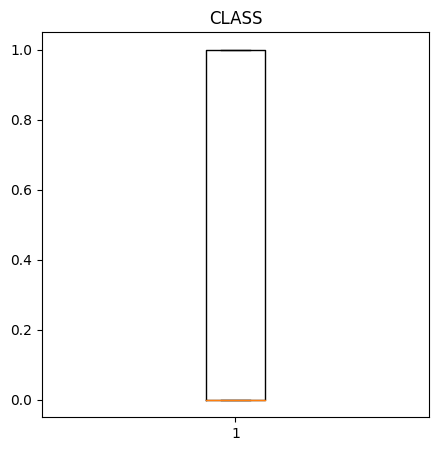

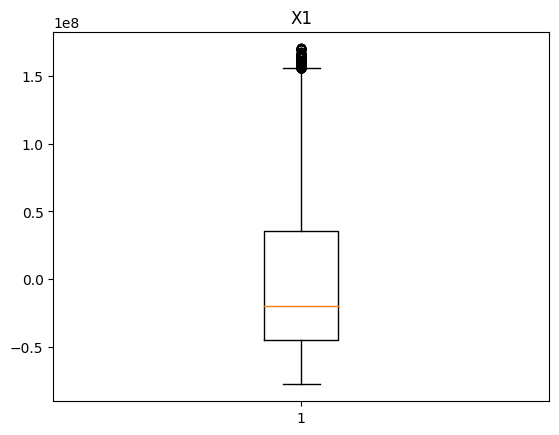

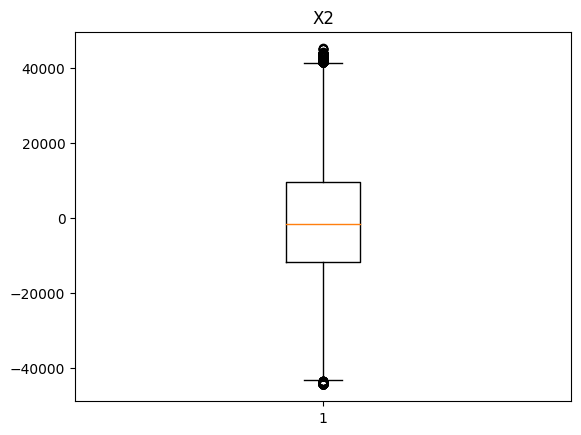

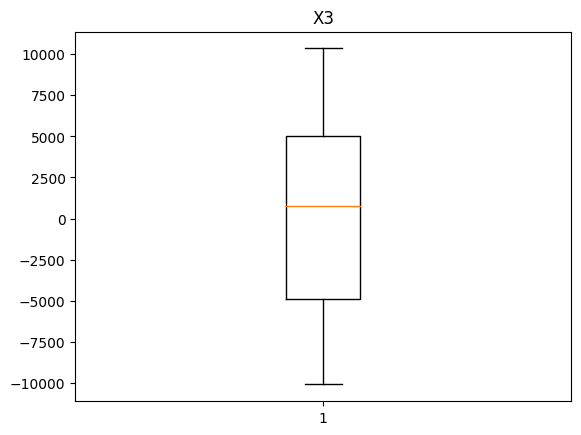

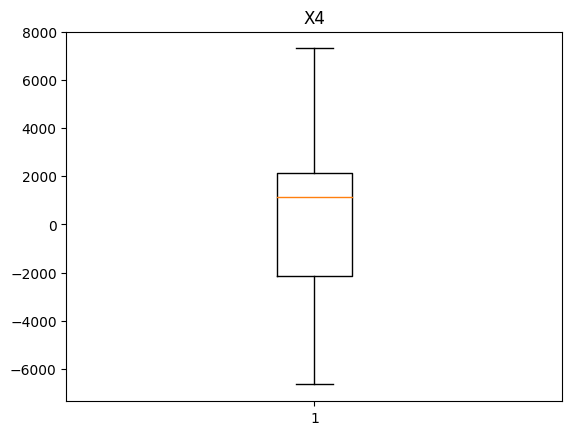

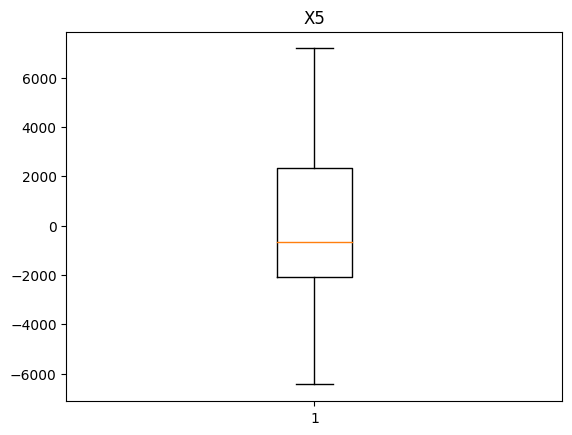

In [42]:
mlp.figure(figsize=(5,5))
for i in data:
    mlp.boxplot(data[i])
    mlp.title(i)
    mlp.show()

In [43]:
IQR=[]
IQR.append(data["X1"].quantile(0.75)-data["X1"].quantile(0.25))
IQR

[80203616.97749528]

In [44]:
upper=[]
IQR.append(data["X1"].quantile(0.75)+1.5*IQR[0])
IQR

[80203616.97749528, 155474897.66708818]

In [45]:
lower=[]
IQR.append(data["X1"].quantile(0.25)-1.5*IQR[0])
IQR

[80203616.97749528, 155474897.66708818, -165339570.24289295]

In [46]:
data['X1']=np.where(data['X1']>155474897.66708818,155474897.66708818,np.where(data['X1']<-165339570.24289295,-165339570.24289295,data['X1']))

In [47]:
IQR=[]
IQR.append(data["X2"].quantile(0.75)-data["X2"].quantile(0.25))
IQR

[21142.130876336683]

In [48]:
upper=[]
IQR.append(data["X2"].quantile(0.75)+1.5*IQR[0])
IQR

[21142.130876336683, 41209.50752840652]

In [49]:
lower=[]
IQR.append(data["X2"].quantile(0.25)-1.5*IQR[0])
IQR

[21142.130876336683, 41209.50752840652, -43359.015976940216]

In [50]:
data['X2']=np.where(data['X2']>41209.50752840652,41209.50752840652,np.where(data['X2']<-43359.015976939874,-43359.015976939874,data['X2']))

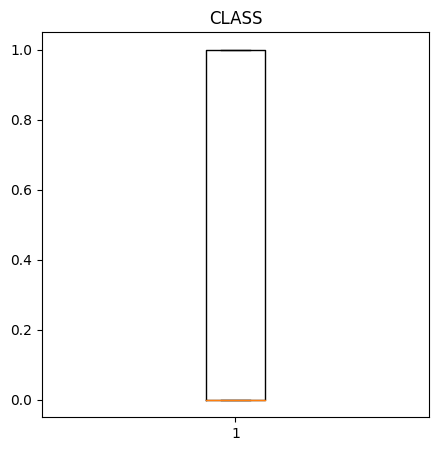

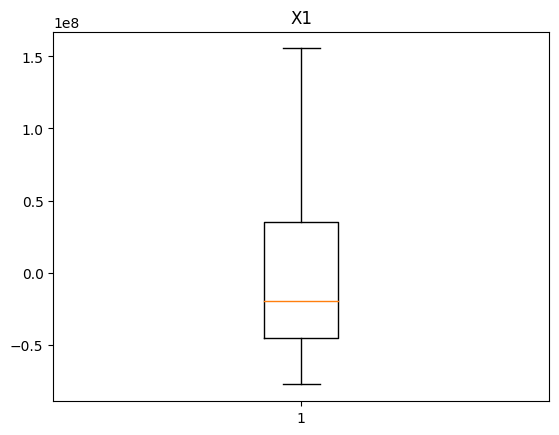

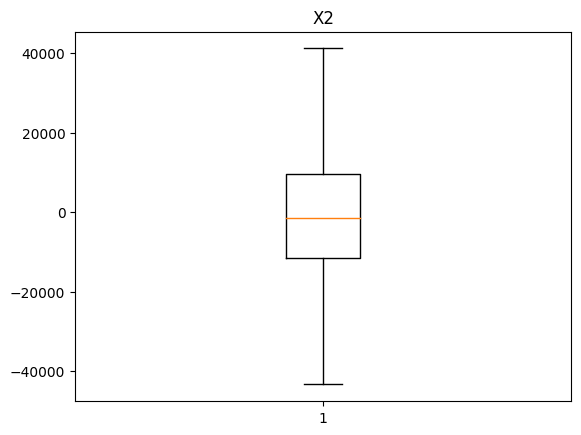

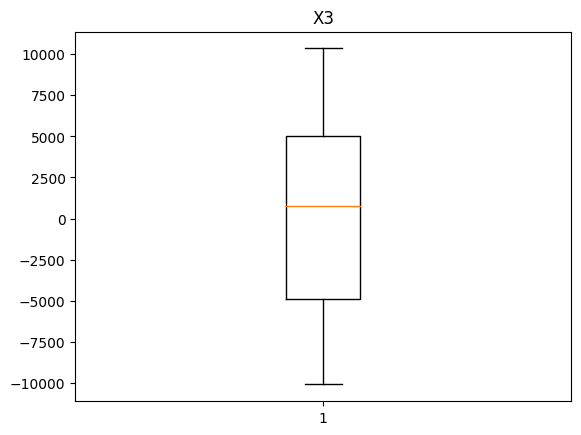

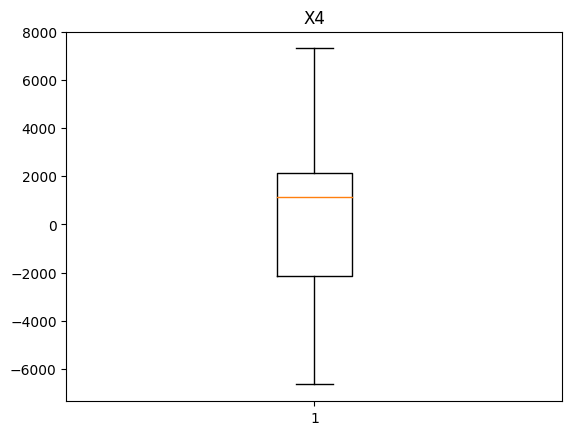

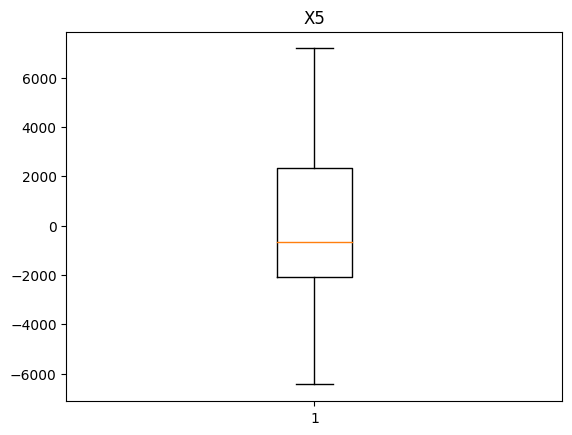

In [51]:
mlp.figure(figsize=(5,5))
for i in data:
    mlp.boxplot(data[i])
    mlp.title(i)
    mlp.show()

# Spliting of data for test train

In [52]:
y=data.iloc[:,[0]].values
x=data.iloc[:,1:].values

In [53]:
x.shape

(65188, 5)

In [54]:
y.shape

(65188, 1)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
x_train.shape

(45631, 5)

In [57]:
y_train.shape

(45631, 1)

In [58]:
x_test.shape

(19557, 5)

In [59]:
y_test.shape

(19557, 1)

In [62]:
logpred=log.predict(x_test)

In [63]:
logpred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [64]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,logpred)
cm=confusion_matrix(y_test,logpred)

In [66]:
accuracy

0.5424144807485811

In [67]:
cm

array([[8575, 6097],
       [2852, 2033]], dtype=int64)

In [68]:
import sklearn.metrics as metrics
fpr,tpr,thershold=metrics.roc_curve(y_test,logpred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.5003092599248361

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [71]:
dtcpred=dtc.predict(x_test)

In [72]:
dtcpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [74]:
accuracy=accuracy_score(y_test,dtcpred)
cm=confusion_matrix(y_test,dtcpred)

In [75]:
accuracy

0.655315232397607

In [76]:
cm

array([[11240,  3432],
       [ 3309,  1576]], dtype=int64)

In [77]:
fpr,tpr,thershold=metrics.roc_curve(y_test,dtcpred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.5443526630494839

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

C:\Users\yuvar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [79]:
rfcpred=rfc.predict(x_test)

In [80]:
rfcpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [82]:
accuracy=accuracy_score(y_test,rfcpred)
cm=confusion_matrix(y_test,rfcpred)

In [83]:
accuracy

0.7162141432735082

In [84]:
cm

array([[13002,  1670],
       [ 3880,  1005]], dtype=int64)

In [85]:
fpr,tpr,thershold=metrics.roc_curve(y_test,rfcpred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.5459547928416837

In [86]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [87]:
neigh.fit(x_train,y_train)

C:\Users\yuvar\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [88]:
neipred=neigh.predict(x_test)

In [89]:
neipred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [91]:
accuracy=accuracy_score(y_test,neipred)
cm=confusion_matrix(y_test,neipred)

In [92]:
accuracy

0.6947384568185304

In [93]:
cm

array([[12393,  2279],
       [ 3691,  1194]], dtype=int64)

In [94]:
fpr,tpr,thershold=metrics.roc_curve(y_test,neipred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.5445459095175961

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models, predictions = clf.fit(x_train,x_test,y_train, y_test)
print(models)

In [95]:
import pickle

In [96]:
pickle.dump(rfc,open("Genetic classification.pkl","wb"))